<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/4_Problems/2_13_Matplotlib Format Charts.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## 🟩 Subplots with Bar Charts (2.13.1)

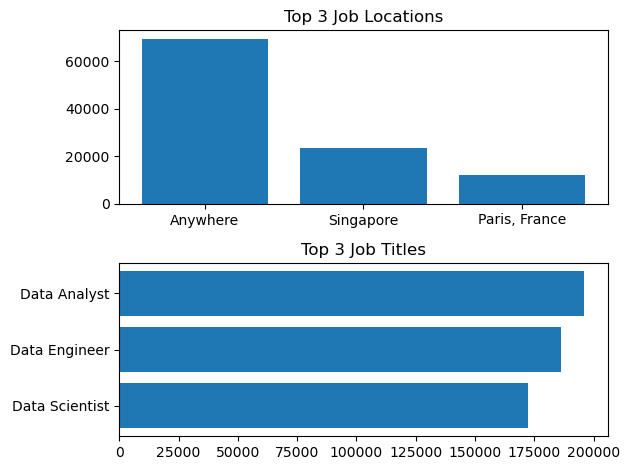

In [35]:
# Create a subplot with 2 rows and 1 column:

# In the first subplot, plot a bar chart of the top 3 job locations by the number of job postings.
# In the second subplot, plot a horizontal bar chart of the top 3 job titles by the number of job postings.
# Use tight_layout() to adjust the spacing between subplots.
fig,ax=plt.subplots(2,1)

top3_location=df.groupby('job_location')['job_title_short'].size().sort_values(ascending=False).head(3)
ax[0].bar(top3_location.index,top3_location.values)
ax[0].set_title('Top 3 Job Locations')

top3_job_title=df.groupby('job_title_short').size().sort_values(ascending=False).head(3)
ax[1].barh(top3_job_title.index,top3_job_title.values)
ax[1].set_title('Top 3 Job Titles')
fig.tight_layout()
ax[1].invert_yaxis()

---

## 🟨 Subplots with Job Titles by Schedule (2.13.2)

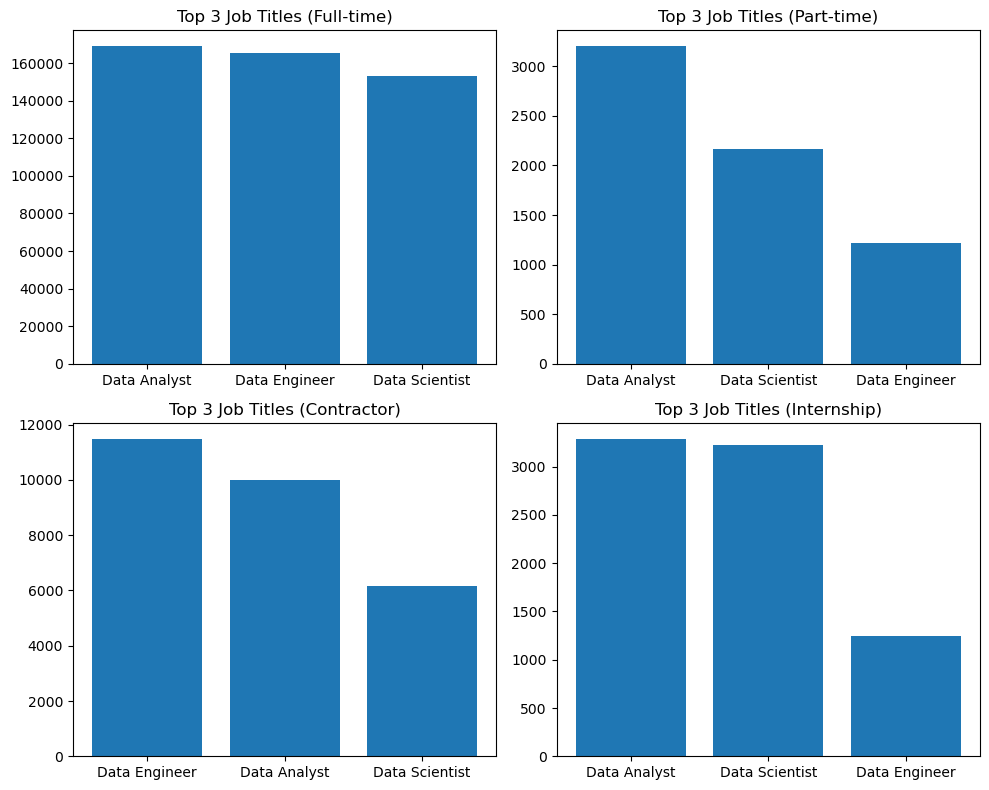

In [ ]:
# Code Needed
schedules = ['Full-time', 'Part-time', 'Contractor', 'Internship']
# Problem Statement:
# Create a subplot with 2 rows and 2 columns:

# In each subplot, plot a bar chart of the top 3 job titles by the number of job postings for each job schedule type (Full-time, Part-time, Contractor, and Internship).
# Use fig.tight_layout() to adjust the spacing between subplots.
df_part_time=df[df.job_schedule_type=='Part-time']
df_full_time=df[df.job_schedule_type=='Full-time']
df_contractor=df[df.job_schedule_type=='Contractor']
df_internship=df[df.job_schedule_type=='Internship']
ax0=df_full_time.groupby('job_title_short').size().sort_values(ascending=False).head(3)
ax1=df_part_time.groupby('job_title_short').size().sort_values(ascending=False).head(3)
ax2=df_contractor.groupby('job_title_short').size().sort_values(ascending=False).head(3)
ax3=df_internship.groupby('job_title_short').size().sort_values(ascending=False).head(3)
# plt.figure(figsize=(20,20))
fig,ax=plt.subplots(2,2,figsize=(10,8))
ax[0][0].bar(ax0.index,ax0.values) 
ax[0][0].set_title('Top 3 Job Titles ('+schedules[0]+')')
ax[0][1].bar(ax1.index,ax1.values)
ax[0][1].set_title('Top 3 Job Titles ('+schedules[1]+')')
ax[1][0].bar(ax2.index,ax2.values)
ax[1][0].set_title('Top 3 Job Titles ('+schedules[2]+')')
ax[1][1].bar(ax3.index,ax3.values)
ax[1][1].set_title('Top 3 Job Titles ('+schedules[3]+')')
fig.tight_layout()
plt.show()

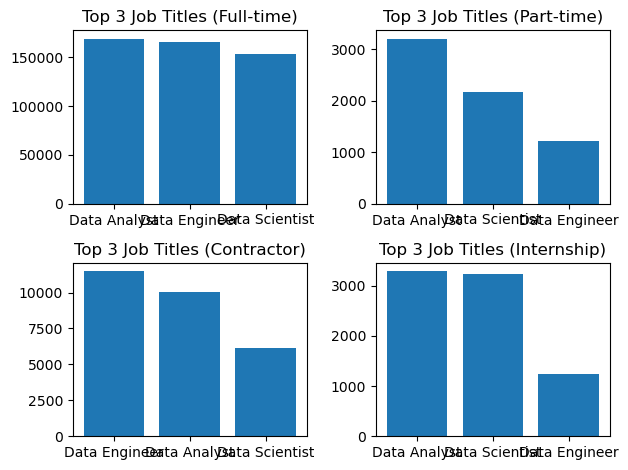

In [50]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

fig, ax = plt.subplots(2, 2)

# Job schedule types
schedules = ['Full-time', 'Part-time', 'Contractor', 'Internship']

for i, schedule in enumerate(schedules):
    df_schedule = df[df['job_schedule_type'] == schedule]
    job_titles = df_schedule['job_title_short'].value_counts().head(3)
    ax[i//2, i%2].bar(job_titles.index, job_titles.values)
    ax[i//2, i%2].set_title(f'Top 3 Job Titles ({schedule})')

fig.tight_layout()
plt.show()


---

## 🟥 Top Skills for Job Roles Subplots (2.13.3)

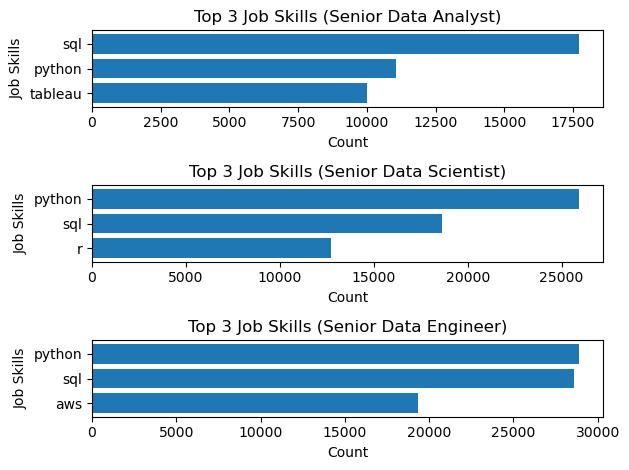

In [119]:
# Code Needed
job_roles = ['Senior Data Analyst', 'Senior Data Scientist', 'Senior Data Engineer']

# Problem Statement:
# Create a subplot with 3 rows and 1 column:

# In each subplot, plot a horizontal bar chart of the top 3 job skills by the number of job postings for each job title (Senior Data Scientist, Senior Data Engineer, and Senior Data Analyst).
# Use fig.tight_layout() to adjust the spacing between subplots and invert_yaxis() to invert the y-axis in each subplot.

fig,ax=plt.subplots(3,1)

for i, title in enumerate(job_roles):
    job_role=df[df.job_title_short==title]
    job_role=(job_role
    .job_skills
    .apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
    .explode('job_skills')
    .value_counts()
    .head(3))
    ax[i].barh(job_role.index,job_role.values)
    ax[i].set_title(f'Top 3 Job Skills ({title})')
    ax[i].invert_yaxis()
    ax[i].set_xlabel('Count')
    ax[i].set_ylabel('Job Skills')
fig.tight_layout()




---